In [1]:
import os, sys
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import numpy as np

In [3]:
import pandas as pd

# Load the CSV 
data = pd.read_csv('A:/10x/10X_Acadamy/week1/Data/raw_analyst_ratings.csv/raw_analyst_ratings.csv')


In [4]:
data.head()

,Unnamed: 0,headline,url,publisher,date,stock
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54-04:00,A
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20-04:00,A
2,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07-04:00,A
3,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06-04:00,A
4,4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 11:38:59-04:00,A


In [5]:
print(data.isnull().sum())

Unnamed: 0    0
headline      0
url           0
publisher     0
date          0
stock         0
dtype: int64


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1407328 entries, 0 to 1407327
Data columns (total 6 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   Unnamed: 0  1407328 non-null  int64 
 1   headline    1407328 non-null  object
 2   url         1407328 non-null  object
 3   publisher   1407328 non-null  object
 4   date        1407328 non-null  object
 5   stock       1407328 non-null  object
dtypes: int64(1), object(5)
memory usage: 64.4+ MB


In [7]:
data.shape

(1407328, 6)

In [8]:
data['headline_length'] = data['headline'].apply(len)
print(data['headline_length'].describe())

count    1.407328e+06
mean     7.312051e+01
std      4.073531e+01
min      3.000000e+00
25%      4.700000e+01
50%      6.400000e+01
75%      8.700000e+01
max      5.120000e+02
Name: headline_length, dtype: float64


In [9]:
publisher_counts = data['publisher'].value_counts()
print(publisher_counts)

publisher
Paul Quintaro        228373
Lisa Levin           186979
Benzinga Newsdesk    150484
Charles Gross         96732
Monica Gerson         82380
                      ...  
MoneyGeek                 1
muathe                    1
Robert Morris             1
LeftCoastHedgie           1
Jeremie Capron            1
Name: count, Length: 1034, dtype: int64


<Axes: xlabel='date'>

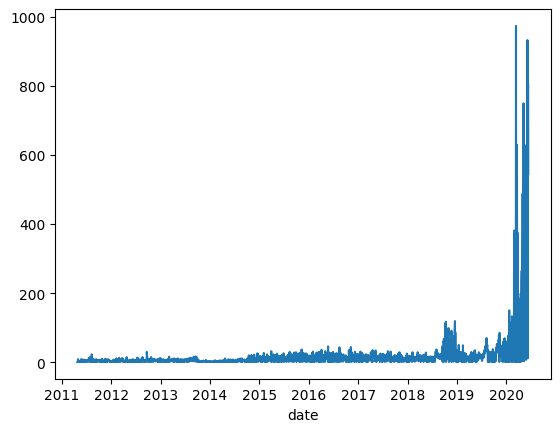

In [10]:

data['date'] = pd.to_datetime(data['date'], errors='coerce')
data['date'] = data['date'].dt.date
publication_trends = data['date'].value_counts().sort_index()
publication_trends.plot(kind='line')

## WOrking on Sentimental Analysis
Using Textblob

In [15]:
from textblob import TextBlob

data['sentiment'] = data['headline'].apply(lambda x: TextBlob(x).sentiment.polarity)
print(data[['headline', 'sentiment']].head(10))

                                            headline  sentiment
0            Stocks That Hit 52-Week Highs On Friday       0.00
1         Stocks That Hit 52-Week Highs On Wednesday       0.00
2                      71 Biggest Movers From Friday       0.00
3       46 Stocks Moving In Friday's Mid-Day Session       0.00
4  B of A Securities Maintains Neutral on Agilent...       0.00
5  CFRA Maintains Hold on Agilent Technologies, L...       0.00
6  UBS Maintains Neutral on Agilent Technologies,...       0.00
7  Agilent Technologies shares are trading higher...       0.25
8  Wells Fargo Maintains Overweight on Agilent Te...       0.00
9         10 Biggest Price Target Changes For Friday       0.00


In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(data['headline'])
feature_names = vectorizer.get_feature_names_out()

In [ ]:
publication_frequency = data.groupby('date').size()
publication_frequency.plot(kind='bar', title='Publication Frequency Over Time')

In [ ]:
publisher_analysis = data.groupby('publisher').size().sort_values(ascending=False)
print(publisher_analysis)